In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load datasets
ratings = pd.read_csv(r"C:\Users\Shivani\Downloads\MovieLens\ratings.csv")
tags = pd.read_csv(r"C:\Users\Shivani\Downloads\MovieLens\tags.csv")
movies = pd.read_csv(r"C:\Users\Shivani\Downloads\MovieLens\movies.csv")
links = pd.read_csv(r"C:\Users\Shivani\Downloads\MovieLens\links.csv")

# Merge Ratings with Tags using LEFT JOIN on ['userId', 'movieId']
ratings_tags = pd.merge(ratings, tags, on=['userId', 'movieId'], how='left')

# Merge with Movies and Links on 'movieId'
merged_df = ratings_tags.merge(movies, on='movieId', how='left')
merged_df = merged_df.merge(links, on='movieId', how='left')

print(merged_df.head())

   userId  movieId  rating  timestamp_x  tag  timestamp_y  \
0       1        1     4.0    964982703  NaN          NaN   
1       1        3     4.0    964981247  NaN          NaN   
2       1        6     4.0    964982224  NaN          NaN   
3       1       47     5.0    964983815  NaN          NaN   
4       1       50     5.0    964982931  NaN          NaN   

                         title                                       genres  \
0             Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1      Grumpier Old Men (1995)                               Comedy|Romance   
2                  Heat (1995)                        Action|Crime|Thriller   
3  Seven (a.k.a. Se7en) (1995)                             Mystery|Thriller   
4   Usual Suspects, The (1995)                       Crime|Mystery|Thriller   

   imdbId   tmdbId  
0  114709    862.0  
1  113228  15602.0  
2  113277    949.0  
3  114369    807.0  
4  114814    629.0  


In [5]:
# Save final DataFrame
merged_df.to_csv("merged_movielens.csv", index=False)
df=merged_df

In [7]:
df.head()

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,genres,imdbId,tmdbId
0,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,1,3,4.0,964981247,NaN,NaN,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
2,1,6,4.0,964982224,NaN,NaN,Heat (1995),Action|Crime|Thriller,113277,949.0
3,1,47,5.0,964983815,NaN,NaN,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0
4,1,50,5.0,964982931,NaN,NaN,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0


In [9]:
df.shape

(102677, 10)

In [11]:
df.nunique()

userId           610
movieId         9724
rating            10
timestamp_x    85043
tag             1543
timestamp_y     3219
title           9719
genres           951
imdbId          9724
tmdbId          9715
dtype: int64

In [13]:
df.isnull().sum()

userId             0
movieId            0
rating             0
timestamp_x        0
tag            99201
timestamp_y    99201
title              0
genres             0
imdbId             0
tmdbId            13
dtype: int64

In [15]:
#Drop the timestamp and tags as they are only 3453 and we already have genres
df = df.drop(columns=['timestamp_x','timestamp_y','tag'])

In [17]:
# Fill missing values of tmdbid with -1
df["tmdbId"]=df["tmdbId"].fillna(-1)

In [19]:
df.head()

,userId,movieId,rating,title,genres,imdbId,tmdbId
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,113277,949.0
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0


In [21]:
df.shape

(102677, 7)

In [23]:
# Clicked if rating >= 4.0
df['clicked'] = (df['rating'] >= 4.0).astype(int)
df.head()

,userId,movieId,rating,title,genres,imdbId,tmdbId,clicked
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,1
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,113277,949.0,1
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0,1
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,1


In [25]:
df['clicked'].value_counts()

clicked
0    52737
1    49940
Name: count, dtype: int64

In [27]:
df = df.join(df["genres"].str.get_dummies(sep="|"))
df.head()

,userId,movieId,rating,title,genres,imdbId,tmdbId,clicked,(no genres listed),Action,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,113277,949.0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [29]:
df.columns

Index(['userId', 'movieId', 'rating', 'title', 'genres', 'imdbId', 'tmdbId',
       'clicked', '(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [31]:
df['has_no_genres'] = df['(no genres listed)']
df.drop(columns=["(no genres listed)",'genres'], inplace=True)
df.head()

,userId,movieId,rating,title,imdbId,tmdbId,clicked,Action,Adventure,Animation,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,has_no_genres
0,1,1,4.0,Toy Story (1995),114709,862.0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,Grumpier Old Men (1995),113228,15602.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,6,4.0,Heat (1995),113277,949.0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),114369,807.0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,1,50,5.0,"Usual Suspects, The (1995)",114814,629.0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [33]:
# Feature: User average rating
df['user_avg_rating'] = df.groupby('userId')['rating'].transform('mean')

# Feature: User rating count
df['user_rating_count'] = df.groupby('userId')['rating'].transform('count')

#Feature: Movie average rating
df['movie_avg_rating'] = df.groupby('movieId')['rating'].transform('mean')

#Feature: Movie rating count
df['movie_rating_count'] = df.groupby('movieId')['rating'].transform('count')

In [35]:
# Family-friendly: animation, children, comedy, musical
df['is_family_friendly'] = df[['Animation', 'Children', 'Comedy', 'Musical']].max(axis=1)

# Romantic movies
df['is_romantic'] = df['Romance']

# Thriller-type movies
df['is_thriller'] = df[['Thriller', 'Mystery', 'Crime']].max(axis=1)

# Sci-Fi / Fantasy cluster
df['is_scifi_fantasy'] = df[['Sci-Fi', 'Fantasy']].max(axis=1)

# Action-packed cluster
df['is_action_heavy'] = df[['Action', 'Adventure', 'War', 'Western']].max(axis=1)

# Dark/Intense themes
df['is_dark_intense'] = df[['Horror', 'Film-Noir']].max(axis=1)

# Documentary / Realistic
df['is_documentary'] = df['Documentary']


In [37]:
df.columns

Index(['userId', 'movieId', 'rating', 'title', 'imdbId', 'tmdbId', 'clicked',
       'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'has_no_genres', 'user_avg_rating', 'user_rating_count',
       'movie_avg_rating', 'movie_rating_count', 'is_family_friendly',
       'is_romantic', 'is_thriller', 'is_scifi_fantasy', 'is_action_heavy',
       'is_dark_intense', 'is_documentary'],
      dtype='object')

In [39]:
df.head()

,userId,movieId,rating,title,imdbId,tmdbId,clicked,Action,Adventure,Animation,...,user_rating_count,movie_avg_rating,movie_rating_count,is_family_friendly,is_romantic,is_thriller,is_scifi_fantasy,is_action_heavy,is_dark_intense,is_documentary
0,1,1,4.0,Toy Story (1995),114709,862.0,1,0,1,1,...,232,3.920930,215,1,0,0,1,1,0,0
1,1,3,4.0,Grumpier Old Men (1995),113228,15602.0,1,0,0,0,...,232,3.245283,53,1,1,0,0,0,0,0
2,1,6,4.0,Heat (1995),113277,949.0,1,1,0,0,...,232,3.946078,102,0,0,1,0,1,0,0
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),114369,807.0,1,0,0,0,...,232,3.980392,204,0,0,1,0,0,0,0
4,1,50,5.0,"Usual Suspects, The (1995)",114814,629.0,1,0,0,0,...,232,4.252404,208,0,0,1,0,0,0,0


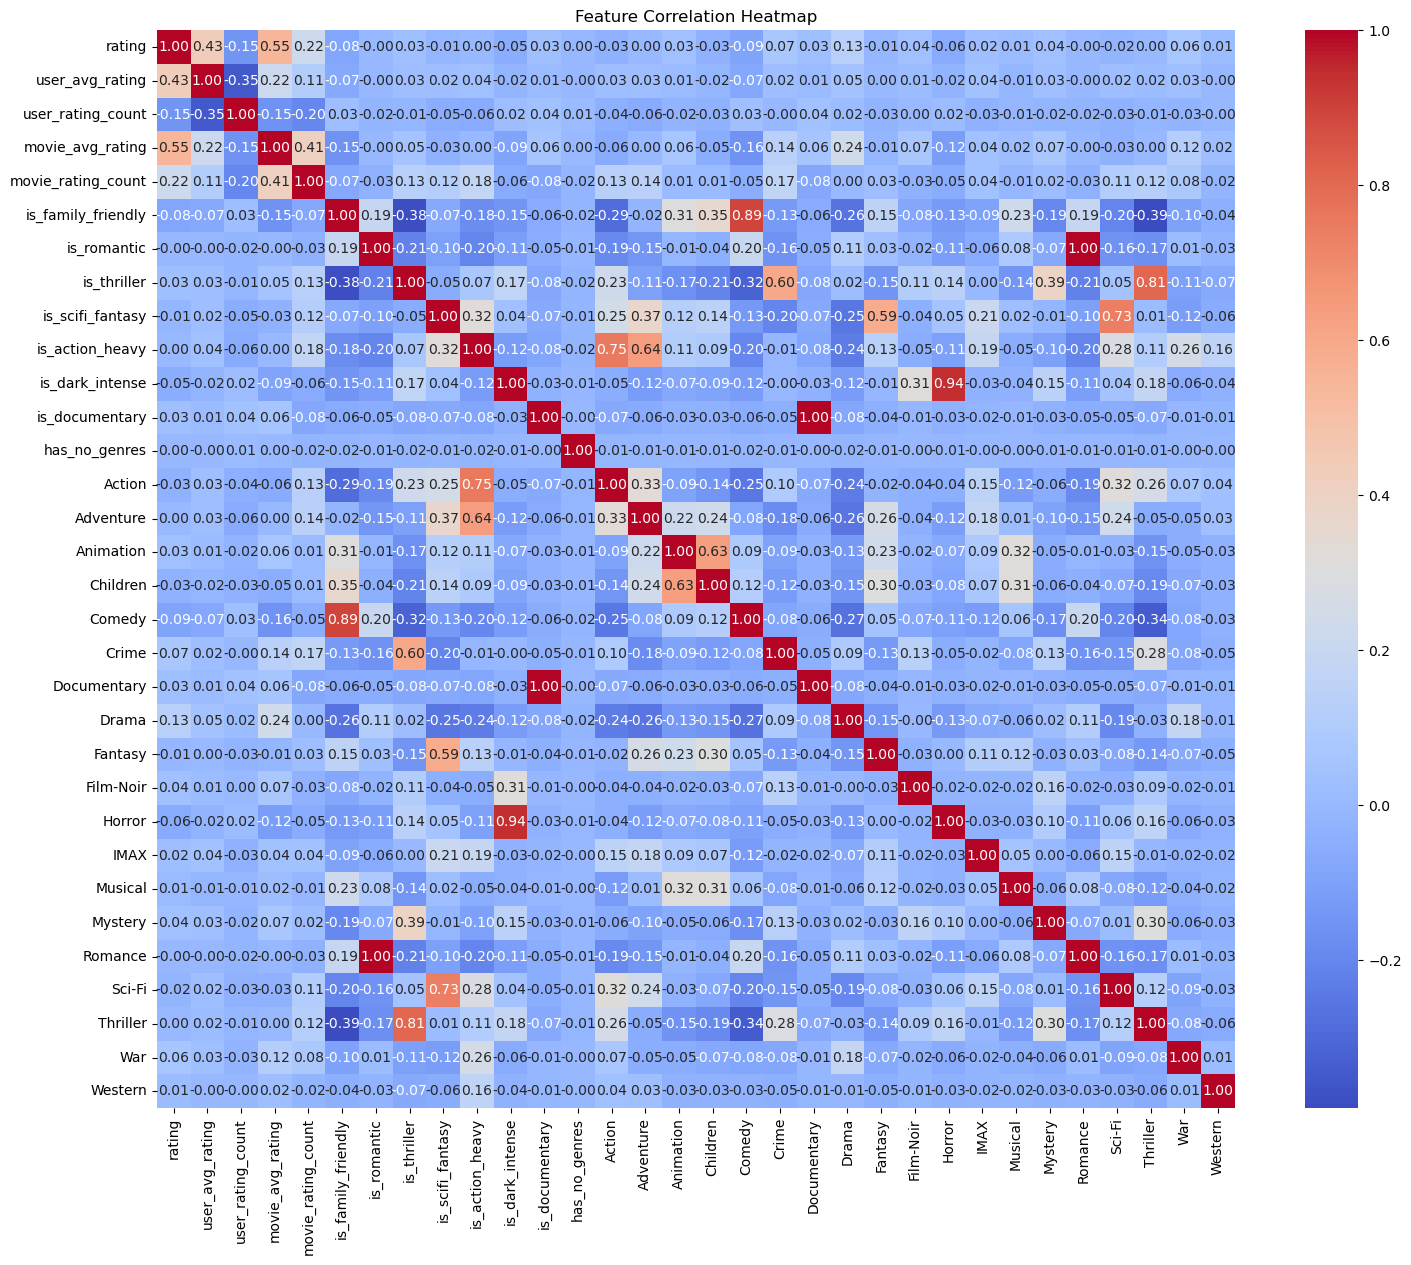

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get correlation matrix for feature columns only
corr_matrix = df[[
    'rating', 'user_avg_rating', 'user_rating_count',
    'movie_avg_rating', 'movie_rating_count',
    'is_family_friendly', 'is_romantic', 'is_thriller', 
    'is_scifi_fantasy', 'is_action_heavy', 'is_dark_intense',
    'is_documentary', 'has_no_genres',
    'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 
    'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
    'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
    'Thriller', 'War', 'Western'
]].corr()

# Plot heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()


In [42]:
#to avoid multicollinearity

cols_to_drop = [
    'Romance',  # represented by is_romantic
    'Thriller', 'Mystery', 'Horror',  # represented by is_dark_intense
    'Children', 'Comedy', 'Animation'  # already in is_family_friendly
]

df = df.drop(columns=cols_to_drop)

In [43]:
df.columns

Index(['userId', 'movieId', 'rating', 'title', 'imdbId', 'tmdbId', 'clicked',
       'Action', 'Adventure', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'IMAX', 'Musical', 'Sci-Fi', 'War', 'Western',
       'has_no_genres', 'user_avg_rating', 'user_rating_count',
       'movie_avg_rating', 'movie_rating_count', 'is_family_friendly',
       'is_romantic', 'is_thriller', 'is_scifi_fantasy', 'is_action_heavy',
       'is_dark_intense', 'is_documentary'],
      dtype='object')

# Load new Dataset

In [47]:
df1=pd.read_csv("movies_2019_2024_ott.csv")
df1.head()

,id,original_title,release_date,movie_avg_rating,movie_rating_count,clicked,Action,Crime,Fantasy,History,...,is_scifi_fantasy,is_action_heavy,is_dark_intense,is_light_hearted,popularity_norm,overview_nlp_1,overview_nlp_2,overview_nlp_3,overview_nlp_4,overview_nlp_5
0,278,The Shawshank Redemption,1994-09-23,4.3525,26221,1,0,1,0,0,...,0,0,0,1,0.031966,0.214872,0.030931,0.139224,0.002333,-0.062085
1,238,The Godfather,1972-03-14,4.3475,19877,1,0,1,0,0,...,0,0,0,1,0.046238,0.234938,-0.063687,0.167557,0.022166,-0.082865
2,240,The Godfather Part II,1974-12-20,4.2880,12001,1,0,1,0,0,...,0,0,0,1,0.045432,0.254844,0.128699,0.072078,-0.250808,-0.207686
3,424,Schindler's List,1993-12-15,4.2835,15409,1,0,0,0,1,...,0,1,0,1,0.021221,0.202824,0.037987,-0.195274,0.519746,-0.091121
4,389,12 Angry Men,1957-04-10,4.2705,8276,1,0,0,0,0,...,0,0,0,1,0.021091,0.196590,-0.122408,-0.103768,-0.148830,-0.015802


In [49]:
df1.columns

Index(['id', 'original_title', 'release_date', 'movie_avg_rating',
       'movie_rating_count', 'clicked', 'Action', 'Crime', 'Fantasy',
       'History', 'is_family_friendly', 'is_romantic', 'is_thriller',
       'is_scifi_fantasy', 'is_action_heavy', 'is_dark_intense',
       'is_light_hearted', 'popularity_norm', 'overview_nlp_1',
       'overview_nlp_2', 'overview_nlp_3', 'overview_nlp_4', 'overview_nlp_5'],
      dtype='object')

# Merge both datasets

In [51]:
# Merging the datasets on 'tmdbId' (assuming 'tmdbId' exists in both datasets)
# Merge df and df1 on tmdbId = id, outer join to preserve all rows
merged_df = pd.merge(df, df1, how='outer', left_on='tmdbId', right_on='id')

merged_df.columns

Index(['userId', 'movieId', 'rating', 'title', 'imdbId', 'tmdbId', 'clicked_x',
       'Action_x', 'Adventure', 'Crime_x', 'Documentary', 'Drama', 'Fantasy_x',
       'Film-Noir', 'IMAX', 'Musical', 'Sci-Fi', 'War', 'Western',
       'has_no_genres', 'user_avg_rating', 'user_rating_count',
       'movie_avg_rating_x', 'movie_rating_count_x', 'is_family_friendly_x',
       'is_romantic_x', 'is_thriller_x', 'is_scifi_fantasy_x',
       'is_action_heavy_x', 'is_dark_intense_x', 'is_documentary', 'id',
       'original_title', 'release_date', 'movie_avg_rating_y',
       'movie_rating_count_y', 'clicked_y', 'Action_y', 'Crime_y', 'Fantasy_y',
       'History', 'is_family_friendly_y', 'is_romantic_y', 'is_thriller_y',
       'is_scifi_fantasy_y', 'is_action_heavy_y', 'is_dark_intense_y',
       'is_light_hearted', 'popularity_norm', 'overview_nlp_1',
       'overview_nlp_2', 'overview_nlp_3', 'overview_nlp_4', 'overview_nlp_5'],
      dtype='object')

In [53]:
# List of common columns with both _x and _y versions
columns_to_merge = [
    'clicked', 'Action', 'Crime', 'Fantasy', 'movie_avg_rating',
    'movie_rating_count', 'is_family_friendly', 'is_romantic',
    'is_thriller', 'is_scifi_fantasy', 'is_action_heavy', 'is_dark_intense'
]

for col in columns_to_merge:
    merged_df[col] = merged_df[f'{col}_y'].combine_first(merged_df[f'{col}_x'])

# Now drop all the _x and _y versions
cols_to_drop = [f'{col}_x' for col in columns_to_merge] + [f'{col}_y' for col in columns_to_merge]
merged_df.drop(columns=cols_to_drop, inplace=True)

# Optional: Drop 'id' if you no longer need it
merged_df.drop(columns=['id'], inplace=True, errors='ignore')

In [55]:
merged_df.columns

Index(['userId', 'movieId', 'rating', 'title', 'imdbId', 'tmdbId', 'Adventure',
       'Documentary', 'Drama', 'Film-Noir', 'IMAX', 'Musical', 'Sci-Fi', 'War',
       'Western', 'has_no_genres', 'user_avg_rating', 'user_rating_count',
       'is_documentary', 'original_title', 'release_date', 'History',
       'is_light_hearted', 'popularity_norm', 'overview_nlp_1',
       'overview_nlp_2', 'overview_nlp_3', 'overview_nlp_4', 'overview_nlp_5',
       'clicked', 'Action', 'Crime', 'Fantasy', 'movie_avg_rating',
       'movie_rating_count', 'is_family_friendly', 'is_romantic',
       'is_thriller', 'is_scifi_fantasy', 'is_action_heavy',
       'is_dark_intense'],
      dtype='object')

In [57]:
# Combine title and original_title into one column called 'title'
merged_df['title'] = merged_df['title'].fillna(merged_df['original_title'])
# Then drop column
merged_df.drop(columns=['original_title'], inplace=True)

In [59]:
merged_df.isnull().sum()

userId                 3884
movieId                3884
rating                 3884
title                     0
imdbId                 3884
tmdbId                 3884
Adventure              3884
Documentary            3884
Drama                  3884
Film-Noir              3884
IMAX                   3884
Musical                3884
Sci-Fi                 3884
War                    3884
Western                3884
has_no_genres          3884
user_avg_rating        3884
user_rating_count      3884
is_documentary         3884
release_date          10690
History               10690
is_light_hearted      10690
popularity_norm       10690
overview_nlp_1        10690
overview_nlp_2        10690
overview_nlp_3        10690
overview_nlp_4        10690
overview_nlp_5        10690
clicked                   0
Action                    0
Crime                     0
Fantasy                   0
movie_avg_rating          0
movie_rating_count        0
is_family_friendly        0
is_romantic         

In [61]:
df['clicked'].value_counts()

clicked
0    52737
1    49940
Name: count, dtype: int64

In [63]:
merged_df = merged_df[~merged_df['userId'].isnull()]

In [65]:
merged_df.isnull().sum()

userId                    0
movieId                   0
rating                    0
title                     0
imdbId                    0
tmdbId                    0
Adventure                 0
Documentary               0
Drama                     0
Film-Noir                 0
IMAX                      0
Musical                   0
Sci-Fi                    0
War                       0
Western                   0
has_no_genres             0
user_avg_rating           0
user_rating_count         0
is_documentary            0
release_date          10690
History               10690
is_light_hearted      10690
popularity_norm       10690
overview_nlp_1        10690
overview_nlp_2        10690
overview_nlp_3        10690
overview_nlp_4        10690
overview_nlp_5        10690
clicked                   0
Action                    0
Crime                     0
Fantasy                   0
movie_avg_rating          0
movie_rating_count        0
is_family_friendly        0
is_romantic         

In [67]:
merged_df.fillna({
    'popularity_norm': merged_df['popularity_norm'].median(),
    'overview_nlp_1': 0,
    'overview_nlp_2': 0,
    'overview_nlp_3': 0,
    'overview_nlp_4': 0,
    'overview_nlp_5': 0
}, inplace=True)


In [69]:
# For release_date (string column)
merged_df['release_date'] = merged_df['release_date'].fillna('Unknown')

# For binary columns (History, is_light_hearted)
binary_cols = ['History', 'is_light_hearted']
for col in binary_cols:
    merged_df[col] = merged_df[col].fillna(0).astype(int)


In [71]:
merged_df.shape

(103139, 40)

In [73]:
merged_df.head()

,userId,movieId,rating,title,imdbId,tmdbId,Adventure,Documentary,Drama,Film-Noir,...,Crime,Fantasy,movie_avg_rating,movie_rating_count,is_family_friendly,is_romantic,is_thriller,is_scifi_fantasy,is_action_heavy,is_dark_intense
0,3.0,2851.0,5.0,Saturn 3 (1980),81454.0,-1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,3.25,4.0,0.0,0.0,1.0,1.0,1.0,0.0
1,90.0,791.0,4.0,"Last Klezmer: Leopold Kozlowski, His Life and ...",113610.0,-1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,4.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,105.0,26587.0,5.0,"Decalogue, The (Dekalog) (1989)",92337.0,-1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,5.00,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,160.0,1107.0,3.5,Loser (1991),102336.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.00,2.0,1.0,0.0,0.0,0.0,0.0,0.0
4,210.0,40697.0,4.0,Babylon 5,105946.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.25,2.0,0.0,0.0,0.0,1.0,0.0,0.0


In [75]:
merged_df.columns

Index(['userId', 'movieId', 'rating', 'title', 'imdbId', 'tmdbId', 'Adventure',
       'Documentary', 'Drama', 'Film-Noir', 'IMAX', 'Musical', 'Sci-Fi', 'War',
       'Western', 'has_no_genres', 'user_avg_rating', 'user_rating_count',
       'is_documentary', 'release_date', 'History', 'is_light_hearted',
       'popularity_norm', 'overview_nlp_1', 'overview_nlp_2', 'overview_nlp_3',
       'overview_nlp_4', 'overview_nlp_5', 'clicked', 'Action', 'Crime',
       'Fantasy', 'movie_avg_rating', 'movie_rating_count',
       'is_family_friendly', 'is_romantic', 'is_thriller', 'is_scifi_fantasy',
       'is_action_heavy', 'is_dark_intense'],
      dtype='object')

In [77]:
#Save in training dataset for CTR Prediction
train_df=merged_df.drop(['popularity_norm', 'overview_nlp_1', 'overview_nlp_2', 'overview_nlp_3',
       'overview_nlp_4', 'overview_nlp_5','userId', 'movieId','imdbId', 'tmdbId'],axis=1)

In [79]:
train_df.columns

Index(['rating', 'title', 'Adventure', 'Documentary', 'Drama', 'Film-Noir',
       'IMAX', 'Musical', 'Sci-Fi', 'War', 'Western', 'has_no_genres',
       'user_avg_rating', 'user_rating_count', 'is_documentary',
       'release_date', 'History', 'is_light_hearted', 'clicked', 'Action',
       'Crime', 'Fantasy', 'movie_avg_rating', 'movie_rating_count',
       'is_family_friendly', 'is_romantic', 'is_thriller', 'is_scifi_fantasy',
       'is_action_heavy', 'is_dark_intense'],
      dtype='object')

In [81]:
train_df.to_csv("merged_movie_data.csv", index=False)

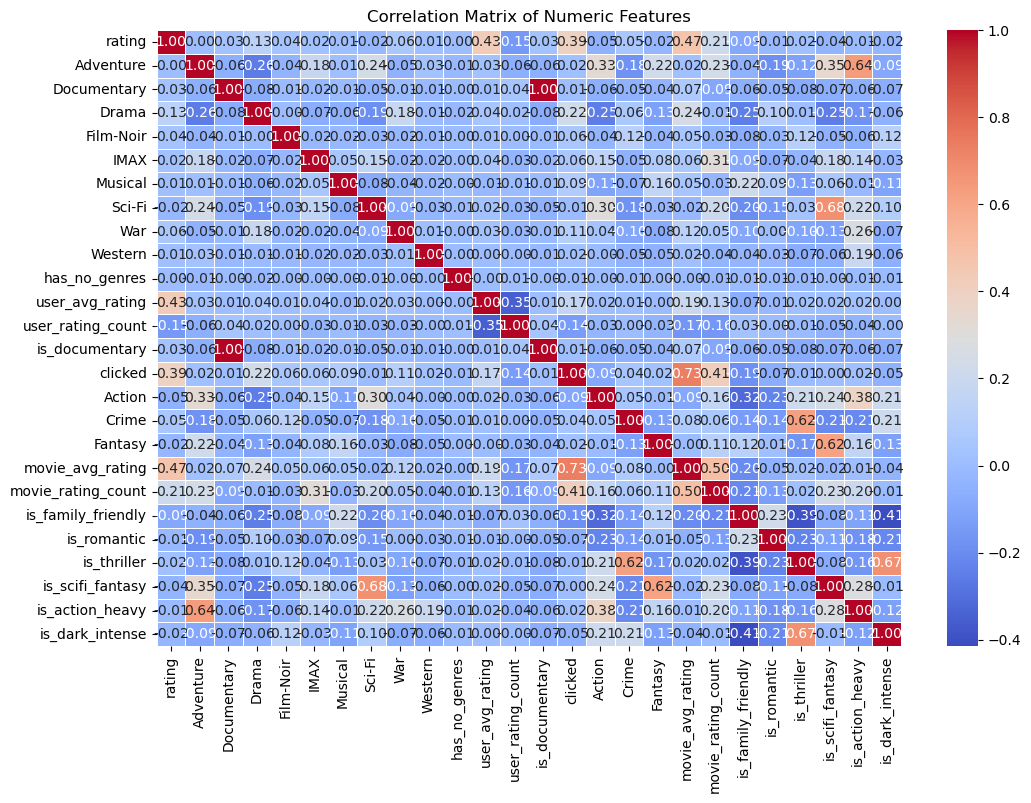

In [82]:
import seaborn as sns

# Select only numeric columns
numeric_features = train_df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
corr_matrix = train_df[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [85]:
x=train_df.drop(['title','clicked','release_date','Documentary','rating','movie_avg_rating'],axis=1)
y=train_df['clicked']

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

# RandomForestClassifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
rcf_model=RandomForestClassifier()
rcf_model.fit(x_train,y_train)

RandomForestClassifier()

In [90]:
y_pred_rcf=rcf_model.predict(x_test)

In [91]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score
accuracy_rclf=accuracy_score(y_test,y_pred_rcf)
rclf=classification_report(y_test, y_pred_rcf)
rf_roc_auc=roc_auc_score(y_test,y_pred_rcf)
print("Accuracy:",accuracy_rclf)
print(rclf)
print("ROC-AUC Score:",rf_roc_auc)

Accuracy: 0.9098797750630211
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      9082
         1.0       0.93      0.91      0.92     11546

    accuracy                           0.91     20628
   macro avg       0.91      0.91      0.91     20628
weighted avg       0.91      0.91      0.91     20628

ROC-AUC Score: 0.9095680985449927


# XGBoost

In [133]:
import xgboost as xgb
from xgboost import XGBClassifier
xg_model = XGBClassifier(n_estimators=400, max_depth=8, learning_rate=0.05, eval_metric="logloss", random_state=42)
xg_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [134]:
y_pred_xg=xg_model.predict(x_test)

In [135]:
xgb_accuracy=accuracy_score(y_test, y_pred_xg)
xgb_report=classification_report(y_test,y_pred_xg)
print("Accuracy",xgb_accuracy)
print(xgb_report)
y_proba = xg_model.predict_proba(x_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy 0.9211266240062052
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      9082
         1.0       0.94      0.92      0.93     11546

    accuracy                           0.92     20628
   macro avg       0.92      0.92      0.92     20628
weighted avg       0.92      0.92      0.92     20628

ROC AUC: 0.9785894004289801


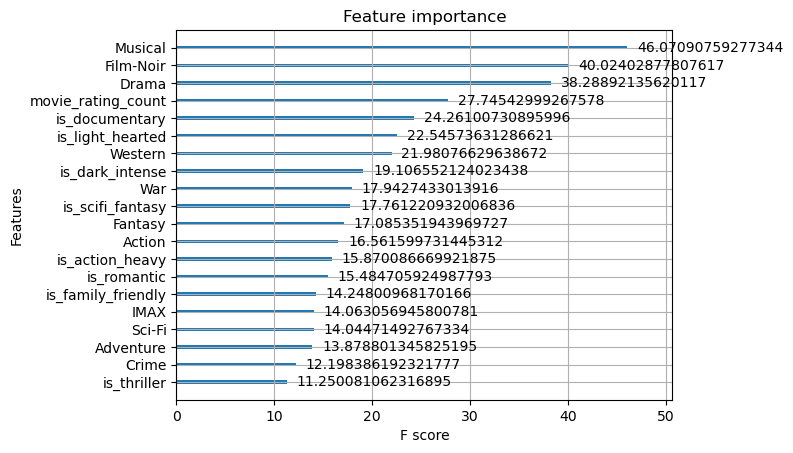

In [101]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xg_model, max_num_features=20, importance_type='gain')  # 'gain' is usually the most useful
plt.show()


100%|===================| 20618/20628 [17:02<00:00]        

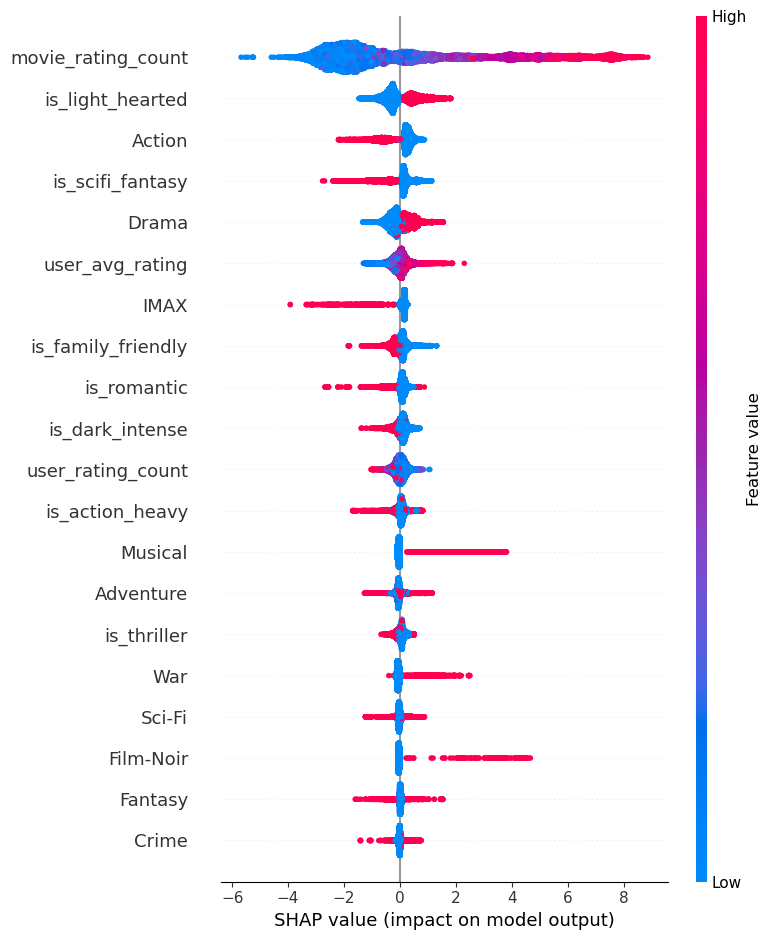

In [296]:
import shap

# Create explainer
explainer = shap.Explainer(xg_model, x_train, feature_names=x_train.columns)

# Get SHAP values
shap_values = explainer(x_test)

# Summary plot
shap.summary_plot(shap_values, x_test, max_display=20)


# Recommend Similar Movies

In [103]:
#save csv for merged_df
merged_df.to_csv("merged_movie_file.csv",index=False)

In [143]:
def recommend_by_genres(input_genres, top_n=10):
    
    # Normalize input genres
    input_genres = [g.strip().lower() for g in input_genres.split(',')]

    # Get matching genre columns in the dataset
    genre_cols = [col for col in merged_df.columns if col.lower() in input_genres]

    # Filter movies that have at least one of the selected genres
    filtered_df = merged_df[merged_df[genre_cols].sum(axis=1) > 0]

    # Remove duplicates based on movie titles to avoid recommending the same movie multiple times
    filtered_df = filtered_df.drop_duplicates(subset='title')

    # If there are no movies with the selected genres, recommend at least one movie with at least one matching genre
    if len(filtered_df) == 0:
        filtered_df = merged_df[merged_df[genre_cols].sum(axis=1) > 0].drop_duplicates(subset='title')
        top_movies = filtered_df.head(1)  # Return at least one movie with a genre match
    else:
        # Sort by popularity or any other relevant metric
        top_movies = filtered_df.sort_values(by='popularity_norm', ascending=False).head(top_n)

    return top_movies[['title', 'popularity_norm'] + genre_cols]
   


In [145]:
recommend_by_genres("Action, Sci-Fi", top_n=5)

,title,popularity_norm,Sci-Fi,Action
102460,Logan (2017),0.163146,1.0,1.0
9488,"Terminator, The (1984)",0.158926,1.0,1.0
103006,Thor: Ragnarok (2017),0.157750,1.0,1.0
94469,Ghostbusters (2016),0.157480,1.0,1.0
21049,"Matrix, The (1999)",0.156790,1.0,1.0


# Streamlit Code

In [109]:
train_df.columns

Index(['rating', 'title', 'Adventure', 'Documentary', 'Drama', 'Film-Noir',
       'IMAX', 'Musical', 'Sci-Fi', 'War', 'Western', 'has_no_genres',
       'user_avg_rating', 'user_rating_count', 'is_documentary',
       'release_date', 'History', 'is_light_hearted', 'clicked', 'Action',
       'Crime', 'Fantasy', 'movie_avg_rating', 'movie_rating_count',
       'is_family_friendly', 'is_romantic', 'is_thriller', 'is_scifi_fantasy',
       'is_action_heavy', 'is_dark_intense'],
      dtype='object')

In [111]:
import joblib
joblib.dump(xg_model, 'movielens_ctr.joblib')

['movielens_ctr.joblib']

In [123]:
streamlit_code="""
import streamlit as st
import joblib
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

# Page setup
st.set_page_config(page_title="🎥 Movie CTR Predictor", layout="wide")
st.title("🎯 Movie Click-Through Rate (CTR) Predictor & Recommender")
st.markdown("🔍 *Estimate how likely a user is to click on a recommended movie.*")

# Load model and data
model = joblib.load("movielens_ctr.joblib")
train_df = pd.read_csv("merged_movie_data.csv")  # 🔁 Ensure this file exists
merged_df=pd.read_csv("merged_movie_file.csv")

# Expected features for prediction
expected_features = ['Adventure','Drama', 'Film-Noir', 'IMAX', 'Musical', 'Sci-Fi', 'War', 'Western',
                     'has_no_genres', 'user_avg_rating', 'user_rating_count', 'is_documentary',
                     'History', 'is_light_hearted','Action', 'Crime', 'Fantasy','movie_rating_count',
                     'is_family_friendly', 'is_romantic', 'is_thriller', 'is_scifi_fantasy',
                     'is_action_heavy', 'is_dark_intense']



explainer = shap.TreeExplainer(model)

# Genre Recommendation Function
def recommend_by_genres(input_genres, top_n=10):
    input_genres = [g.strip().lower() for g in input_genres.split(',')]
    genre_cols = [col for col in merged_df.columns if col.lower() in input_genres]
    if not genre_cols:
        return pd.DataFrame(columns=["title", "popularity_norm"])

    filtered_df = merged_df[merged_df[genre_cols].sum(axis=1) > 0].drop_duplicates(subset='title')

    if len(filtered_df) == 0:
        return merged_df[merged_df[genre_cols].sum(axis=1) > 0].drop_duplicates(subset='title').head(1)

    top_movies = filtered_df.sort_values(by='popularity_norm', ascending=False).head(top_n)
    return top_movies[['title', 'popularity_norm'] + genre_cols]

# Sidebar Inputs
st.sidebar.header("📥 Enter Movie & User Info")

user_id = st.sidebar.number_input("👤 User ID", min_value=1)
title = st.sidebar.text_input("🎬 Movie Title")

genres = ["Action", "Adventure", "Crime", "Documentary", "Drama", "Fantasy",
          "Film-Noir", "IMAX", "Musical", "Sci-Fi", "War", "Western"]
selected_genres = st.sidebar.multiselect("🎭 Select Genres", genres)

# Thematic checkboxes
is_family_friendly = st.sidebar.checkbox("👪 Family Friendly")
is_romantic = st.sidebar.checkbox("💕 Romantic")
is_thriller = st.sidebar.checkbox("🔪 Thriller")
is_scifi_fantasy = st.sidebar.checkbox("👽 Sci-Fi / Fantasy")
is_action_heavy = st.sidebar.checkbox("💥 Action Heavy")
is_dark_intense = st.sidebar.checkbox("🌑 Dark & Intense")
is_documentary = st.sidebar.checkbox("🎓 Documentary")

# Profile features
st.sidebar.markdown("🧠 **User & Movie Stats**")
user_avg_rating = st.sidebar.slider("📊 User Avg Rating", 0.0, 5.0, 3.5)
user_rating_count = st.sidebar.number_input("🗳️ User Rating Count", 1, 1000, 450)
movie_avg_rating = st.sidebar.slider("🌟 Movie Avg Rating", 0.0, 5.0, 3.5)
movie_rating_count = st.sidebar.number_input("🎫 Movie Rating Count", 1, 10000, 300)

# Input preparation
def prepare_input():
    row = {
        'Action': int('Action' in selected_genres),
        'Adventure': int('Adventure' in selected_genres),
        'Crime': int('Crime' in selected_genres),
        'Drama': int('Drama' in selected_genres),
        'Fantasy': int('Fantasy' in selected_genres),
        'Film-Noir': int('Film-Noir' in selected_genres),
        'IMAX': int('IMAX' in selected_genres),
        'Musical': int('Musical' in selected_genres),
        'Sci-Fi': int('Sci-Fi' in selected_genres),
        'War': int('War' in selected_genres),
        'Western': int('Western' in selected_genres),
        'has_no_genres': int(len(selected_genres) == 0),
        'user_avg_rating': user_avg_rating,
        'user_rating_count': user_rating_count,
        'movie_rating_count': movie_rating_count,
        'is_family_friendly': int(is_family_friendly),
        'is_romantic': int(is_romantic),
        'is_thriller': int(is_thriller),
        'is_scifi_fantasy': int(is_scifi_fantasy),
        'is_action_heavy': int(is_action_heavy),
        'is_dark_intense': int(is_dark_intense),
        'is_documentary': int(is_documentary),        
        # Defaults for engineered features
        'History': 0,
        'is_light_hearted': 0,
                
    }
    return pd.DataFrame([row])

# Prediction Logic
if st.sidebar.button("🚀 Predict CTR"):
    input_df = prepare_input()
    input_df = input_df.reindex(columns=expected_features, fill_value=0)

    # Prediction
    prediction = model.predict(input_df)[0]
    pred_prob = model.predict_proba(input_df)[0][1]

    col1, col2 = st.columns(2)
    with col1:
        st.subheader("📊 Prediction Result")
        st.markdown(f"🎬 **Movie:** `{title}`")
        st.markdown(f"👤 **User ID:** `{user_id}`")
        st.markdown(f"📈 **Predicted Click:** {'✅ YES' if prediction == 1 else '❌ NO'}")
        st.markdown(f"🔢 **Click Probability:** `{pred_prob:.2%}`")

        if pred_prob > 0.70:
            st.success("🔥 High CTR! Recommend this prominently.")
        elif pred_prob > 0.45:
            st.info("🤔 Moderate interest. Worth suggesting.")
        else:
            st.warning("❄️ Low CTR. Consider other options.")

    with col2:
        st.subheader("🧠 SHAP Force Plot (Explanation)")
        shap_values = explainer.shap_values(input_df)
        plt.figure(figsize=(10, 3))
        shap.force_plot(
            explainer.expected_value,
            shap_values[0],
            input_df.iloc[0],
            matplotlib=True,
            show=False
        )
        plt.savefig("shap_force_plot.png", bbox_inches="tight", dpi=300)
        st.image("shap_force_plot.png", caption="🧐 Feature Impact on CTR Prediction")

    if pred_prob < 0.4:
        st.subheader("💡 Recommendations")
        st.markdown('''
- 🎯 **Recommend higher-rated movies** based on user and movie rating trends  
- 🎭 **Explore lighter or popular genres** like `Drama`, `Comedy`, or `Adventure`  
- 📚 **Use past behavior** to personalize suggestions more effectively  
- 🌟 Consider highlighting movies with strong **family-friendly** or **romantic** themes  
        ''')

# Optional Genre Recommendation Section
st.subheader("🎬 Genre-Based Recommendations")
input_genres_text = st.text_input("Enter genres (comma-separated):", value="Drama, Action")

if st.button("🎯 Recommend Movies"):
    recs = recommend_by_genres(input_genres_text)
    if not recs.empty:
        st.write("🎥 Top Recommendations Based on Genre:")
        st.dataframe(recs)
    else:
        st.warning("No movies found for the entered genres.")
"""
with open("movielens_ctr_newapp1.py", "w",encoding="utf-8") as f:
    f.write(streamlit_code)

print("✅ Streamlit app saved as 'movielens_ctr_newapp1.py'")

✅ Streamlit app saved as 'movielens_ctr_newapp1.py'


In [125]:
!streamlit run movielens_ctr_newapp1.py

^C


# Insights

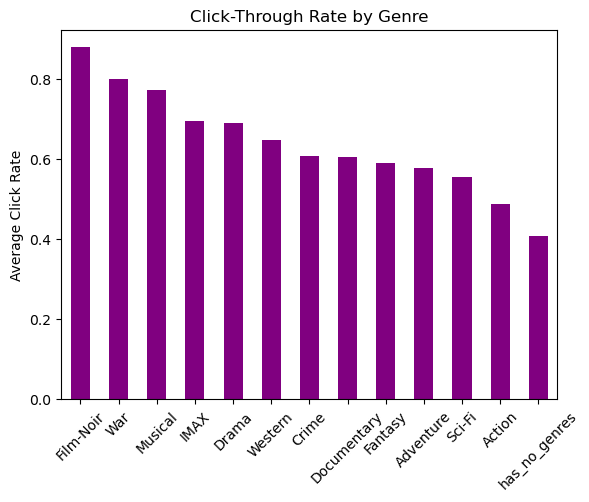

In [115]:
#Top Genres That Drive Clicks
genre_cols = ['Action', 'Adventure', 'Crime', 'Documentary', 'Drama',
              'Fantasy', 'Film-Noir', 'IMAX', 'Musical', 'Sci-Fi',
              'War', 'Western', 'has_no_genres']

genre_ctr = {
    genre: train_df.groupby(genre)['clicked'].mean().get(1, 0)
    for genre in genre_cols
}
genre_ctr = pd.Series(genre_ctr).sort_values(ascending=False)

# Plot
genre_ctr.plot(kind='bar', color='purple')
plt.ylabel('Average Click Rate')
plt.title('Click-Through Rate by Genre')
plt.xticks(rotation=45)
plt.show()


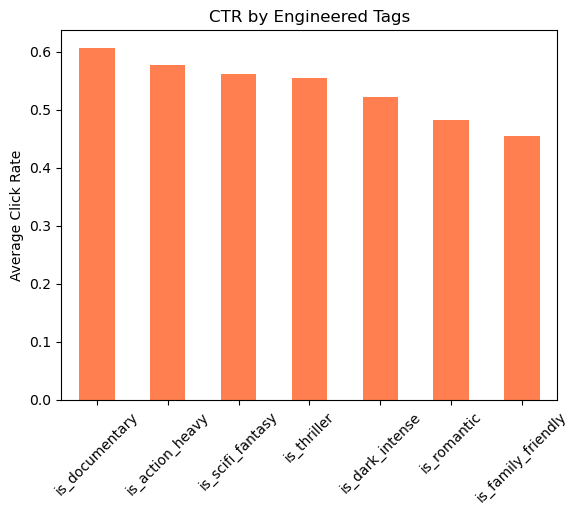

In [117]:
#CTR with Feature engineered tags
engineered_tags = ['is_family_friendly', 'is_romantic', 'is_thriller',
                   'is_scifi_fantasy', 'is_action_heavy', 'is_dark_intense', 'is_documentary']

tag_ctr = {tag: train_df.groupby(tag)['clicked'].mean().get(1, 0) for tag in engineered_tags}
tag_ctr = pd.Series(tag_ctr).sort_values(ascending=False)

tag_ctr.plot(kind='bar', color='coral')
plt.ylabel('Average Click Rate')
plt.title('CTR by Engineered Tags')
plt.xticks(rotation=45)
plt.show()


C:\Users\Shivani\AppData\Local\Temp\ipykernel_3644\1688345530.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_users, x='userId', y='user_ctr', palette='coolwarm')


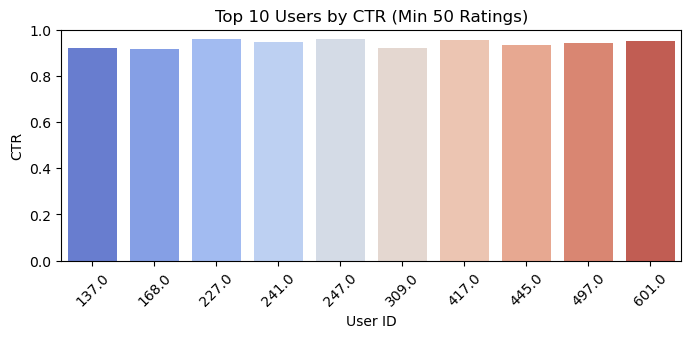

In [119]:
# CTR per user
user_behavior = merged_df.groupby('userId').agg({
    'clicked': ['mean', 'count'],
    'user_avg_rating': 'first'
}).reset_index()
user_behavior.columns = ['userId', 'user_ctr', 'rating_count', 'user_avg_rating']

# Top engaged users (min 50 ratings)
top_users = user_behavior[user_behavior['rating_count'] > 50].sort_values(by='user_ctr', ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 3))
sns.barplot(data=top_users, x='userId', y='user_ctr', palette='coolwarm')
plt.title('Top 10 Users by CTR (Min 50 Ratings)')
plt.xlabel('User ID')
plt.ylabel('CTR')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()
